# Assignment 3A

In this assigment, you will implement and test Monte Carlo Tree Search.

**TODO:** 

1. Enter your information below.
1. Rename `mcts_search_assigned.py` to `mcts_search.py`.
1. Complete the implementation of `mcts` in `mcts_search.py`.
1. Change the default A# from 'A12345678' to your own number.
1. Run all code.
1. Create a pdf version of the notebook.
1. Submit `mcts_search.py`, `assignment3a.pdf`, and `assignment3a.ipynb`. Do not zip them; attach and submit three separate files.

Enter your information below.

**Name:** HaoLiu <br>
**CWID:** A20473685

In [2]:
from game_boards import MNKNode, ConnectFour, DictGameNode
from game_search import alpha_beta_search
from game_play import maxplayer, randplayer, game_play
from mcts_search import mcts
from mcts_utils import ucb1, mcts_player, dot_graph, dot_graph_path

from IPython.display import Image

In [3]:
def create_empty_ttt():
    empty_board = []

    for _ in range(3):
        empty_board.append(['-', '-', '-'])

    return MNKNode(empty_board, k = 3)

In [4]:
def create_empty_c4():
    empty_board = []

    for _ in range(6):
        empty_board.append(['-', '-', '-', '-', '-', '-', '-'])

    return ConnectFour(board=empty_board)

In [5]:
moves = {'A': ['B', 'C', 'D'], 'B': ['E', 'F', 'G'], 'C': ['H', 'I'], 'D': ['J', 'K', 'L'], 'K': ['M', 'N']}

terminal_nodes = {'E': 0.5, 'F': +1, 'G': 0.5, 'H': +1, 'I': 0, 'J': +1, 'L': +1, 'M': 0, 'N': +1}

DictGameNode._moves = moves
DictGameNode._terminal_nodes = terminal_nodes

dg_initial_gn = DictGameNode(board = 'A', np = 'X')

In [6]:
CWID='A20473685' # TODO Change to your own A#.
#WID='A12345678'
simul_seed = int(CWID[1:])


# Testing out MCTS

## Dictionary Game

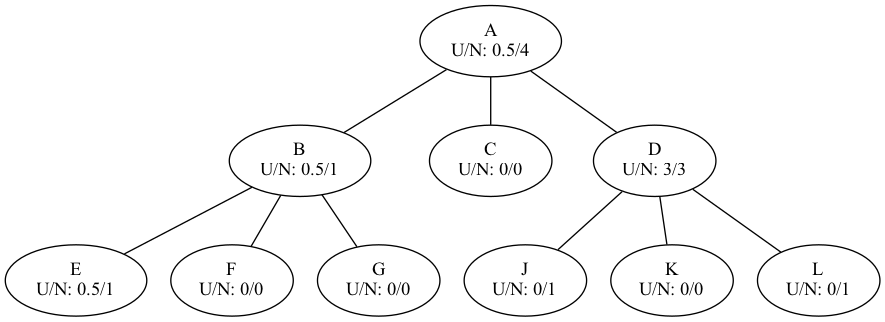

In [13]:
dg_root_mcnode = mcts(dg_initial_gn, ucb1, seed=simul_seed, max_iter=4)
pydot_graph = dot_graph(dg_root_mcnode)
Image(pydot_graph.create_png())

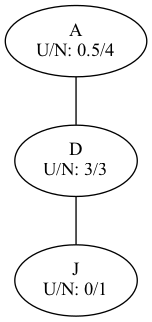

In [14]:

pydot_graph = dot_graph_path(dg_root_mcnode)
Image(pydot_graph.create_png())

## Tic-Tac-Toe

In [8]:
ttt_initial_gn = create_empty_ttt()


### C=1.4

In [9]:
util_f = lambda mcnode: ucb1(mcnode, C=1.4)

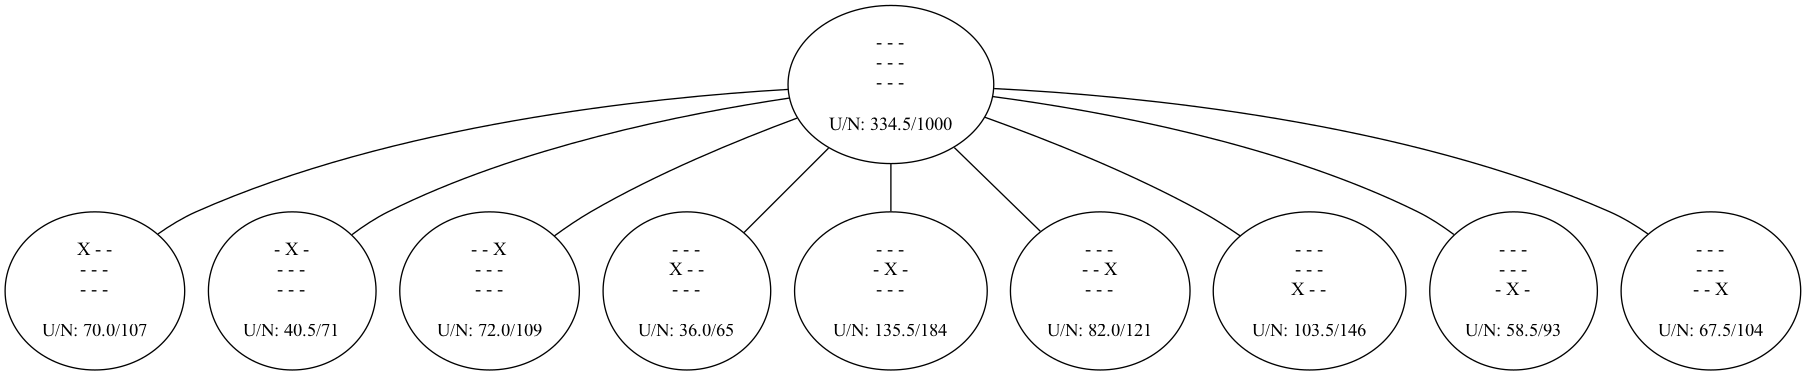

In [10]:
ttt_root_mcnode = mcts(ttt_initial_gn, util_f, seed=simul_seed, max_iter=1000)
pydot_graph = dot_graph(ttt_root_mcnode, max_nodes = 10)
Image(pydot_graph.create_png())

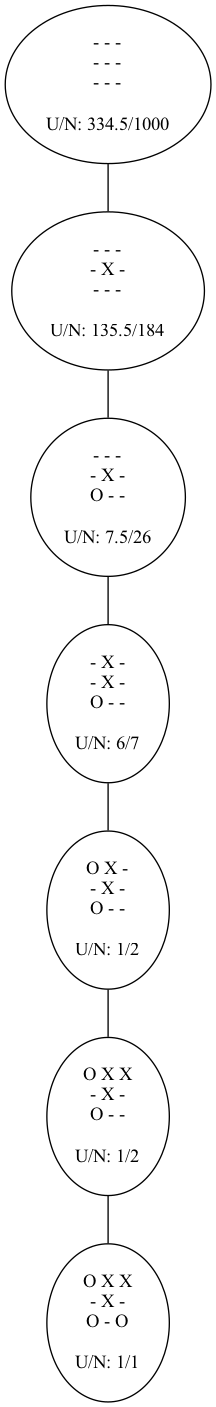

In [11]:
pydot_graph = dot_graph_path(ttt_root_mcnode)
Image(pydot_graph.create_png())

### C=0

In [12]:
util_f = lambda mcnode: ucb1(mcnode, C=0)

In [13]:
ttt_root_mcnode = mcts(ttt_initial_gn, util_f, seed=simul_seed, max_iter=1000)

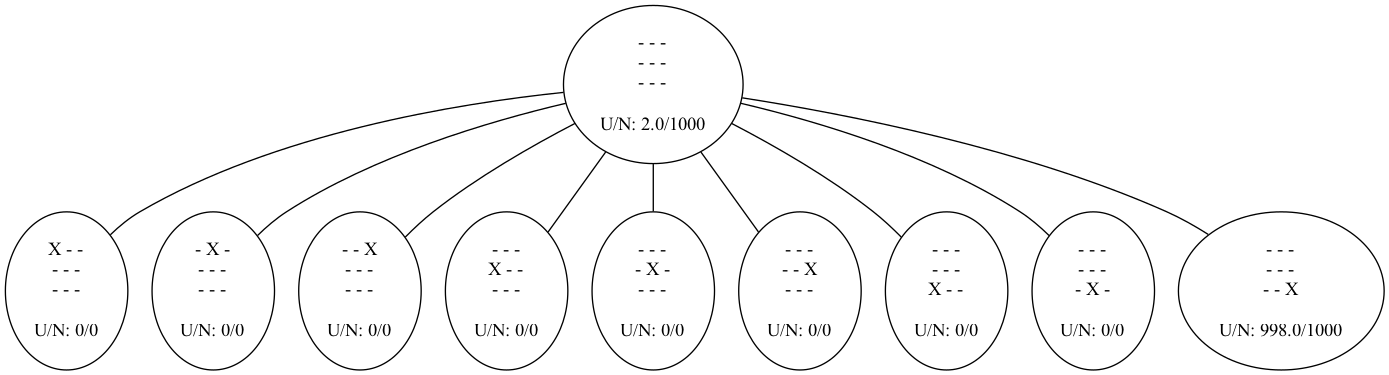

In [14]:
pydot_graph = dot_graph(ttt_root_mcnode, max_nodes = 10)
Image(pydot_graph.create_png())

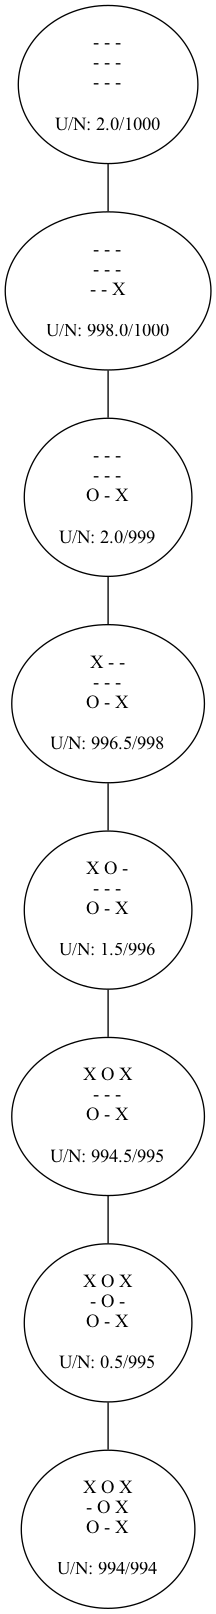

In [15]:
pydot_graph = dot_graph_path(ttt_root_mcnode)
Image(pydot_graph.create_png())

## Connect 4

In [16]:
c4_initial_gn = create_empty_c4()

### C=1.4

In [17]:
util_f = lambda mcnode: ucb1(mcnode, C=1.4)

In [18]:
c4_root_mcnode = mcts(c4_initial_gn, util_f, seed=simul_seed, max_iter=1000)

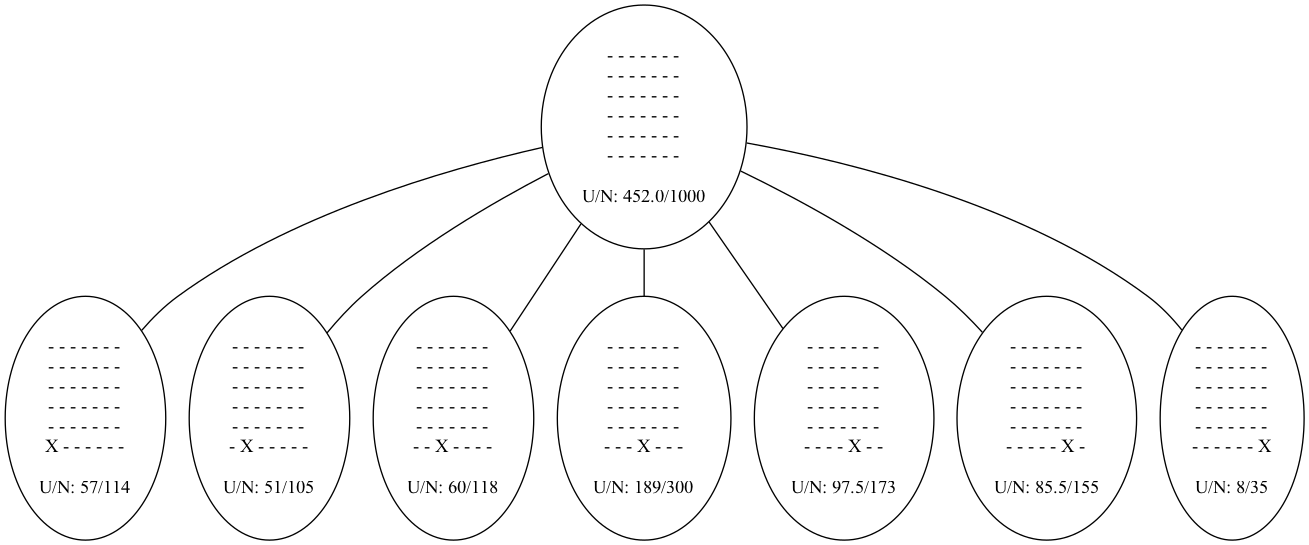

In [19]:
pydot_graph = dot_graph(c4_root_mcnode, max_nodes = 8)
Image(pydot_graph.create_png())

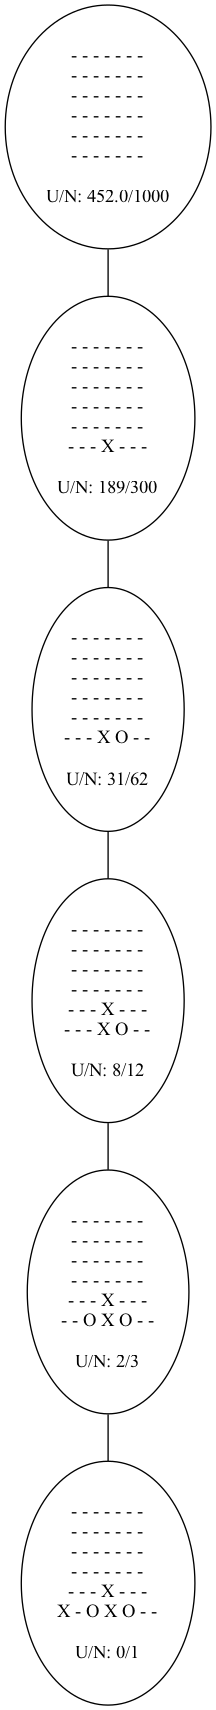

In [20]:
pydot_graph = dot_graph_path(c4_root_mcnode)
Image(pydot_graph.create_png())

### C = 0

In [21]:
util_f = lambda mcnode: ucb1(mcnode, C=0)

In [22]:
c4_root_mcnode = mcts(c4_initial_gn, util_f, seed=simul_seed, max_iter=1000)

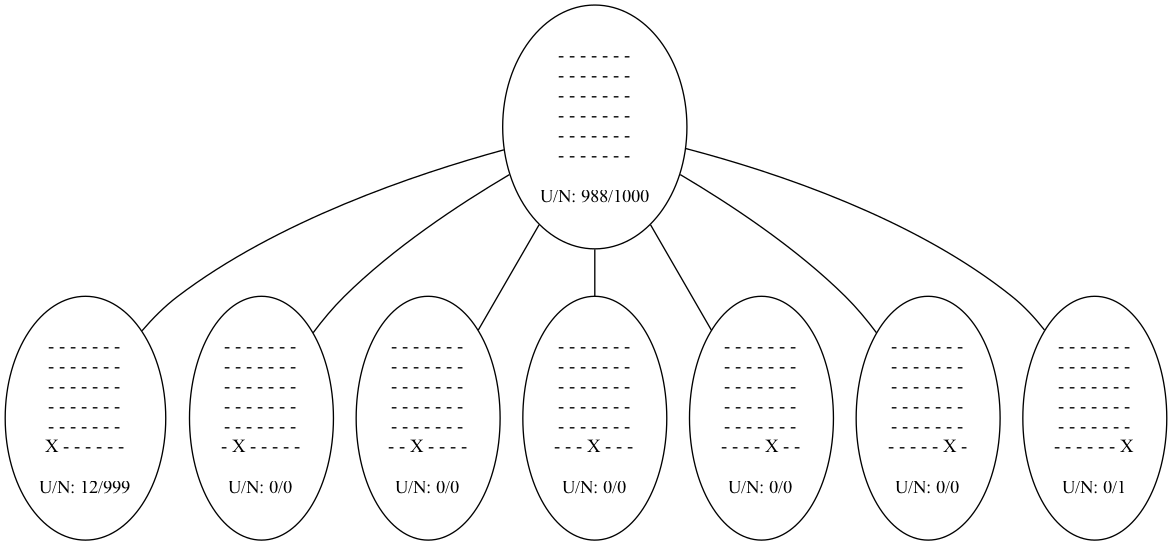

In [23]:
pydot_graph = dot_graph(c4_root_mcnode, max_nodes = 8)
Image(pydot_graph.create_png())

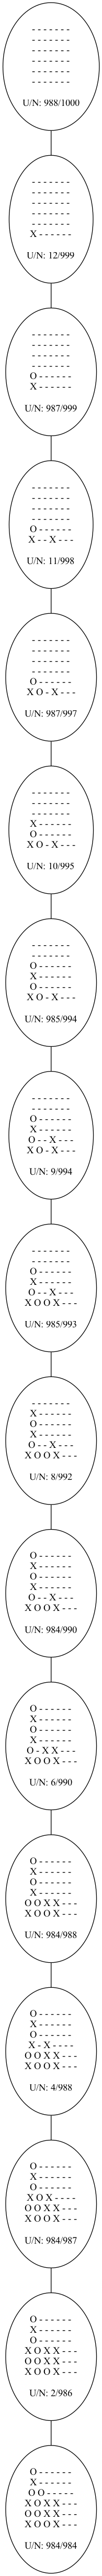

In [24]:
pydot_graph = dot_graph_path(c4_root_mcnode)
Image(pydot_graph.create_png())

# MCTS vs Random Player

In [25]:
util_f = lambda mcnode: ucb1(mcnode, C=1.4)

x_player = lambda b:  mcts_player(b, util_f, seed = simul_seed, max_iter=1000)
o_player = lambda b: randplayer(b, seed=0)

game_play(ttt_initial_gn, x_player, o_player)

- - -
- - -
- - -

It's X's turn.
135.5/184 = 0.74
Chosen move (1, 1, 'X').

- - -
- X -
- - -

It's O's turn.
Chosen move (2, 1, 'O').

- - -
- X -
- O -

It's X's turn.
197.0/227 = 0.87
Chosen move (2, 2, 'X').

- - -
- X -
- O X

It's O's turn.
Chosen move (1, 0, 'O').

- - -
O X -
- O X

It's X's turn.
355/355 = 1.00
Chosen move (0, 0, 'X').


Game ended.
X - -
O X -
- O X

Winner is X.


In [26]:
util_f = lambda mcnode: ucb1(mcnode, C=1.4)

x_player = lambda b:  mcts_player(b, util_f, seed = simul_seed, max_iter=1000)
o_player = lambda b: randplayer(b, seed=0)

game_play(c4_initial_gn, x_player, o_player)

- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - -

It's X's turn.
189/300 = 0.63
Chosen move (5, 3, 'X').

- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - -
- - - X - - -

It's O's turn.
Chosen move (5, 6, 'O').

- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - -
- - - X - - O

It's X's turn.
181/235 = 0.77
Chosen move (5, 2, 'X').

- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - -
- - X X - - O

It's O's turn.
Chosen move (4, 6, 'O').

- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - O
- - X X - - O

It's X's turn.
219/245 = 0.89
Chosen move (5, 4, 'X').

- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - O
- - X X X - O

It's O's turn.
Chosen move (3, 6, 'O').

- - - - - - -
- - - - - - -
- - - - - - -
- - - - - - O
- - - - - - O
- - X X X - O

It's X's turn.
372/372 = 1.00
Chosen move (5, 1, 'X').


Game ended.
- - - - - - -
- - - - - - -
- - - - - - -
- -

# MCTS vs Alpha-Beta

In [27]:
util_f = lambda mcnode: ucb1(mcnode, C=1.4)

x_player = lambda b:  mcts_player(b, util_f, seed = simul_seed, max_iter=1000)
o_player = lambda b: maxplayer(b, algo=alpha_beta_search)

game_play(ttt_initial_gn, x_player, o_player)

- - -
- - -
- - -

It's X's turn.
135.5/184 = 0.74
Chosen move (1, 1, 'X').

- - -
- X -
- - -

It's O's turn.
Chosen move (0, 0, 'O').

O - -
- X -
- - -

It's X's turn.
215.0/265 = 0.81
Chosen move (1, 0, 'X').

O - -
X X -
- - -

It's O's turn.
Chosen move (1, 2, 'O').

O - -
X X O
- - -

It's X's turn.
225.0/340 = 0.66
Chosen move (0, 1, 'X').

O X -
X X O
- - -

It's O's turn.
Chosen move (2, 1, 'O').

O X -
X X O
- O -

It's X's turn.
195.5/367 = 0.53
Chosen move (0, 2, 'X').

O X X
X X O
- O -

It's O's turn.
Chosen move (2, 0, 'O').

O X X
X X O
O O -

It's X's turn.
500.0/1000 = 0.50
Chosen move (2, 2, 'X').


Game ended.
O X X
X X O
O O X

Draw.


In [28]:
util_f = lambda mcnode: ucb1(mcnode, C=1.4)


x_player = lambda b: maxplayer(b, algo=alpha_beta_search)
o_player = lambda b:  mcts_player(b, util_f, seed = simul_seed, max_iter=1000)

game_play(ttt_initial_gn, x_player, o_player)

- - -
- - -
- - -

It's X's turn.
Chosen move (0, 0, 'X').

X - -
- - -
- - -

It's O's turn.
140.0/313 = 0.45
Chosen move (1, 1, 'O').

X - -
- O -
- - -

It's X's turn.
Chosen move (0, 1, 'X').

X X -
- O -
- - -

It's O's turn.
419.0/728 = 0.58
Chosen move (0, 2, 'O').

X X O
- O -
- - -

It's X's turn.
Chosen move (2, 0, 'X').

X X O
- O -
X - -

It's O's turn.
466.0/858 = 0.54
Chosen move (1, 0, 'O').

X X O
O O -
X - -

It's X's turn.
Chosen move (1, 2, 'X').

X X O
O O X
X - -

It's O's turn.
250.0/500 = 0.50
Chosen move (2, 1, 'O').

X X O
O O X
X O -

It's X's turn.
Chosen move (2, 2, 'X').


Game ended.
X X O
O O X
X O X

Draw.
